In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Synthetic accuracies

In [2]:
acc_scores = np.linspace(1, 0.5, 10)
idx = [0,2,4,6,18, 16, 14, 8, 12, 10]

# Order by idx
ordered_matrix = np.array(list(zip(acc_scores, idx)))[np.argsort(idx)]
acc_scores, idx = ordered_matrix[:,0], ordered_matrix[:,1]

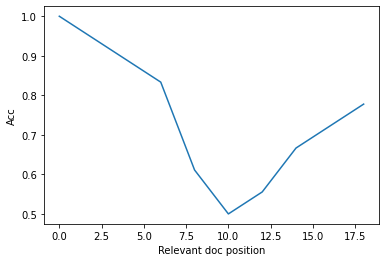

In [3]:
plt.plot(idx, acc_scores)
plt.ylabel("Acc")
plt.xlabel("Relevant doc position")
plt.show()

In [4]:
np.array(list(zip(acc_scores, idx)))[np.argsort(idx)][:,0]

array([1.        , 0.94444444, 0.88888889, 0.83333333, 0.61111111,
       0.5       , 0.55555556, 0.66666667, 0.72222222, 0.77777778])

# Callibration attempt

**Idea:**
Create a mapping from the avg acc on a given index to the rank of that accuracy based on all of the accuracies.

E.g.

| Acc | original_idx | new_idx |
| --- | --- | --- |
| 0.9 | 2 | 0 |
| 0.8 | 1 | 1 |
| 0.7 | 9 | 2 |
| ... | ... | ... |
| 0.5 | 8 | 9 |

In [1]:
def reposition(idx, acc): 
    df = pd.DataFrame({"idx":idx, "acc":acc})
    df = df.sort_values("acc")[::-1]
    df["idx"] = df["idx"].astype("int")
    df["new_idx"] = np.sort(df["idx"])
    return df

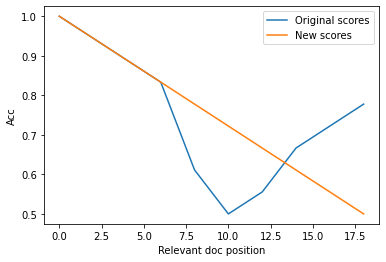

In [6]:
# Initialize scores and idx
acc_scores = np.linspace(1, 0.5, 10)
idx = [0,2,4,6,18, 16, 14, 8, 12, 10]

# Reposition indx and scores
df = reposition(idx, acc_scores)

# Plot results
plt.plot(df.idx.sort_values(), df["acc"].values[np.argsort(df.idx.values)], label="Original scores")

plt.plot(df.new_idx.sort_values(), df["acc"].values[np.argsort(df.new_idx.values)], label="New scores")
plt.ylabel("Acc")
plt.xlabel("Relevant doc position")
plt.legend()
plt.show()

# Nice
Works decently so fare

# More experiments to test it

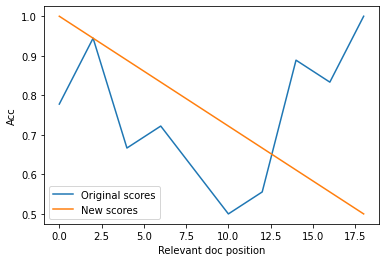

,idx,acc,new_idx
0,18,1.000000,0
1,2,0.944444,2
2,14,0.888889,4
3,16,0.833333,6
4,0,0.777778,8
5,6,0.722222,10
6,4,0.666667,12
7,8,0.611111,14
8,12,0.555556,16
9,10,0.500000,18


In [7]:
# Initialize scores and idx
acc_scores = np.linspace(1, 0.5, 10)
idx = [18,2,14,16,0, 6, 4, 8, 12, 10]

# Reposition indx and scores
df = reposition(idx, acc_scores)

# Plot results
plt.plot(df.idx.sort_values(), df["acc"].values[np.argsort(df.idx.values)], label="Original scores")

plt.plot(df.new_idx.sort_values(), df["acc"].values[np.argsort(df.new_idx.values)], label="New scores")
plt.ylabel("Acc")
plt.xlabel("Relevant doc position")
plt.legend()
plt.show()
display(df)

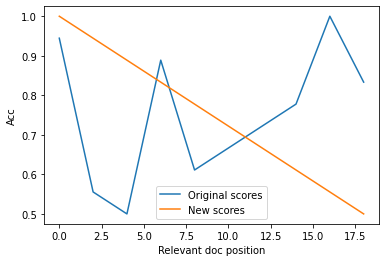

,idx,acc,new_idx
0,16,1.000000,0
1,0,0.944444,2
2,6,0.888889,4
3,18,0.833333,6
4,14,0.777778,8
5,12,0.722222,10
6,10,0.666667,12
7,8,0.611111,14
8,2,0.555556,16
9,4,0.500000,18


In [8]:
# Initialize scores and idx
acc_scores = np.linspace(1, 0.5, 10)
idx = [18,2,14,16,0, 6, 4, 8, 12, 10]
np.random.shuffle(idx)

# Reposition indx and scores
df = reposition(idx, acc_scores)

# Plot results
plt.plot(df.idx.sort_values(), df["acc"].values[np.argsort(df.idx.values)], label="Original scores")

plt.plot(df.new_idx.sort_values(), df["acc"].values[np.argsort(df.new_idx.values)], label="New scores")
plt.ylabel("Acc")
plt.xlabel("Relevant doc position")
plt.legend()
plt.show()
display(df)

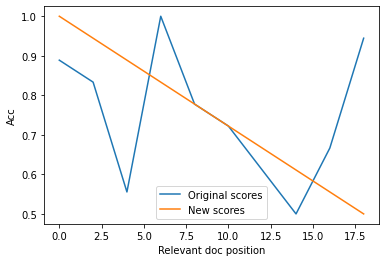

,idx,acc,new_idx
0,6,1.000000,0
1,18,0.944444,2
2,0,0.888889,4
3,2,0.833333,6
4,8,0.777778,8
5,10,0.722222,10
6,16,0.666667,12
7,12,0.611111,14
8,4,0.555556,16
9,14,0.500000,18


In [9]:
# Initialize scores and idx
acc_scores = np.linspace(1, 0.5, 10)
idx = [18,2,14,16,0, 6, 4, 8, 12, 10]
np.random.shuffle(idx)

# Reposition indx and scores
df = reposition(idx, acc_scores)

# Plot results
plt.plot(df.idx.sort_values(), df["acc"].values[np.argsort(df.idx.values)], label="Original scores")

plt.plot(df.new_idx.sort_values(), df["acc"].values[np.argsort(df.new_idx.values)], label="New scores")
plt.ylabel("Acc")
plt.xlabel("Relevant doc position")
plt.legend()
plt.show()
display(df)

# Fill acc on idx without acc (is this even necesarry? - probably not) 
**Assumption**: The values in between 2 connecting positions are liniearly distributed

E.g.

| Acc | original_idx |
| --- | --- | 
| 0.9 | 0 |
| 0.8 |  2 |
| 0.7 |  4 |

Becomes

| Acc | original_idx |
| --- | --- | 
| 0.9 | 0 |
| 0.85 | 1 |
| 0.8 |  2 |
| 0.75 | 3 |
| 0.7 |  4 |